# Exploring-MNIST


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import TensorBoard
import time
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Tensorboard initialization

In [13]:
# Usage : tensorboard --logdir=tensor_logs --host localhost --port 9999
model_name = "digit-recognition-mnist-1-{}".format(int(time.time()))
tensor_board = TensorBoard(log_dir="tensor_logs/{}".format(model_name))
print("Model name for TensorBoard logs : ", model_name)

Model name for tensorboard logs :  digit-recognition-mnist-1-1565431130


### Loading dataset

In [14]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Size of train data:", len(x_train))
print("Size of test data:", len(x_test))

In [17]:
x_train.shape

(60000, 28, 28)

### Lets visualize what the dataset is having

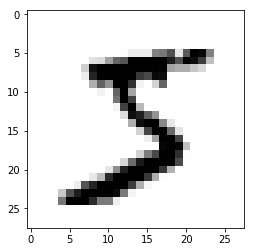

In [18]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


#### Now lets see what one example row of this dataset looks like

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
x_train_flattened = x_train.reshape((x_train.shape[0], -1))
x_test_flattened = x_test.reshape((x_test.shape[0], -1))

print("x_train shape:", x_train.shape)
print("x_train_flattened shape:", x_train_flattened.shape)

print("x_test shape:", x_test.shape)
print("x_test_flattened shape:", x_test_flattened.shape)


x_train shape: (60000, 28, 28)
x_train_flattened shape: (60000, 784)
x_test shape: (10000, 28, 28)
x_test_flattened shape: (10000, 784)


## PCA

Lets try and minimize the dimensions using PCA.

#### For comparision we will use only 5000 points

In [21]:
num_rows = 5000
x_train_pca = x_train_flattened[:num_rows, :]
x_test_pca = x_test_flattened[:num_rows, :]
y_train_pca = y_train[:num_rows]
y_test_pca = y_test[:num_rows]

In [22]:
len(x_train_pca)

5000

In [23]:
pca = PCA(n_components=2)
pca.fit(x_train_pca)
pca_data = pca.transform(x_train_pca)
print("Transformed Shape:", pca_data.shape)

# Adding labels to the pca matrix
new_coordinates = np.column_stack((pca_data, y_train_pca))
print("PCA with headers shape:", new_coordinates.shape)


Transformed Shape: (5000, 2)
PCA with headers shape: (5000, 3)


In [24]:
temp_df = pd.DataFrame(new_coordinates, columns=['PC1', 'PC2', 'Labels'])
temp_df.head()


,PC1,PC2,Labels
0,116.147615,368.834118,5.0
1,1037.282146,386.494641,0.0
2,-28.452011,-453.369706,4.0
3,-877.068861,596.110489,1.0
4,-357.768812,-687.248443,9.0


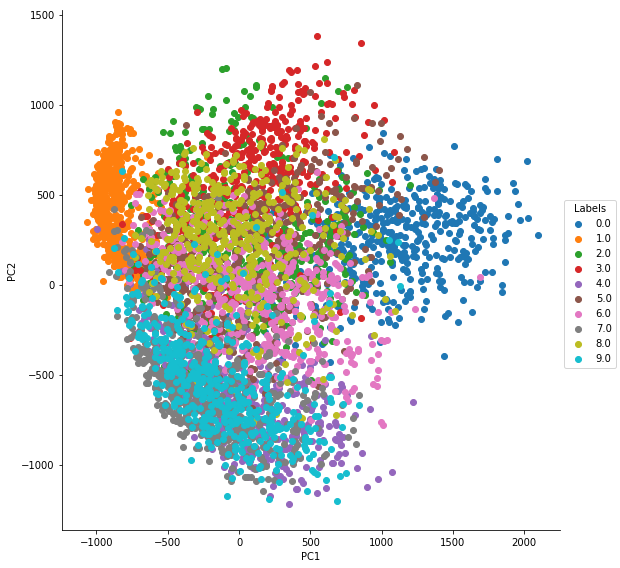

In [25]:
sns.FacetGrid(temp_df, hue='Labels', size=8).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

### Random Forest using 2-PCA components

In [27]:
rf = RandomForestClassifier()
rf.fit(pca_data, y_train_pca)
predictions_rf = rf.predict(pca.transform(x_test_pca))
print(classification_report(y_true=y_test_pca, y_pred=predictions_rf))


/Users/tkmakom/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.61      0.64       460
           1       0.88      0.87      0.87       571
           2       0.27      0.29      0.28       530
           3       0.41      0.43      0.42       500
           4       0.32      0.36      0.34       500
           5       0.21      0.18      0.19       456
           6       0.26      0.32      0.28       462
           7       0.39      0.42      0.40       512
           8       0.24      0.20      0.22       489
           9       0.30      0.26      0.28       520

    accuracy                           0.40      5000
   macro avg       0.40      0.39      0.39      5000
weighted avg       0.40      0.40      0.40      5000



### T-SNE

### Sampling dataset upto 5000 rows

In [28]:
num_rows = 5000

x_train_tsne = x_train_flattened[:num_rows, :]
y_train_tsne = y_train[:num_rows]
x_test_tsne = x_test_flattened[:num_rows, :]
y_test_tsne = y_test[:num_rows]


In [29]:
from sklearn.manifold import TSNE

t = TSNE(n_components=2, random_state=0)
tsne_data = t.fit_transform(x_train_tsne)
print("TSNE Transformed Shape:", tsne_data.shape)

# Adding labels to the pca matrix
new_coordinates = np.column_stack((tsne_data, y_train_tsne))
print("TSNE with headers shape:", new_coordinates.shape)


TSNE Transformed Shape: (5000, 2)
TSNE with headers shape: (5000, 3)


In [30]:
temp_df = pd.DataFrame(new_coordinates, columns = ['T1', 'T2', 'Labels'])
temp_df.head()

,T1,T2,Labels
0,-32.993019,1.222761,5.0
1,-31.450253,63.555325,0.0
2,-52.676872,-31.835800,4.0
3,59.794098,-22.963928,1.0
4,-12.948778,-36.158436,9.0


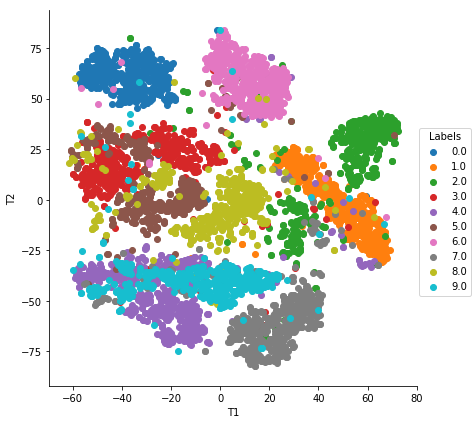

In [31]:
sns.FacetGrid(temp_df, hue='Labels', size=6).map(plt.scatter, 'T1', 'T2').add_legend()
plt.show()

## Dense Neural Network

### Normalize 
As you can see, there are a lot of zeros and then there are very big numbers such as 135 and 132 because the pixel intensity is from 0 to 255. Now we want to normalize this dataset. For this we'll use keras' normalize method stored in `tf.keras.utils.normalize()`

In [32]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [33]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

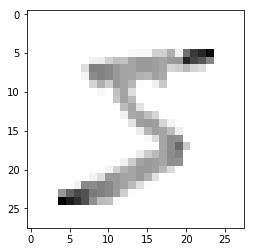

In [34]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### Creating Model

Now that we have normalized our data, we will create our model. Read more about keras model [here](https://keras.io/getting-started/sequential-model-guide/).

In [35]:
x_train.shape

(60000, 28, 28)

In [53]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [55]:
epochs = 5
history = model.fit(x_train, y_train, epochs=epochs, validation_split= 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 96us/sample - loss: 0.3374 - acc: 0.9066 - val_loss: 0.1702 - val_acc: 0.9507
Epoch 2/5
54000/54000 [==============================] - 5s 89us/sample - loss: 0.1568 - acc: 0.9541 - val_loss: 0.1178 - val_acc: 0.9658
Epoch 3/5
54000/54000 [==============================] - 5s 91us/sample - loss: 0.1073 - acc: 0.9684 - val_loss: 0.0964 - val_acc: 0.9712
Epoch 4/5
54000/54000 [==============================] - 5s 90us/sample - loss: 0.0803 - acc: 0.9761 - val_loss: 0.0860 - val_acc: 0.9735
Epoch 5/5
54000/54000 [==============================] - 5s 88us/sample - loss: 0.0612 - acc: 0.9823 - val_loss: 0.0825 - val_acc: 0.9760


In [56]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0931 - acc: 0.9715


[0.09313894573850558, 0.9715]

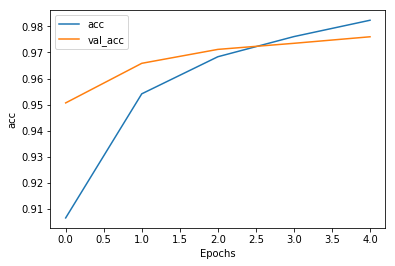

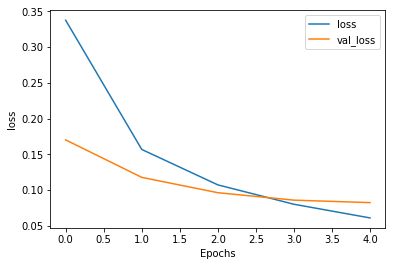

In [57]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

### Prediction

In [58]:
predictions = model.predict([x_test])
p = np.argmax(predictions, axis=1)

In [59]:
print(classification_report(y_test, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.97      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Lets try and make some sense out of it

In [60]:
print(np.argmax(predictions[1]))

2


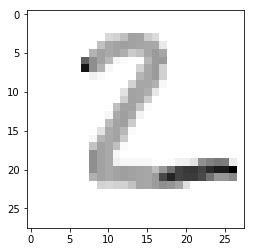

In [61]:
plt.imshow(x_test[1], cmap=plt.cm.binary)

## Finish